### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading data
student_record = pd.read_csv('D:\\Projects\\ML Project\\notebook\\data\\stud.csv')


In [ ]:
#checking first 5 rows of data
student_record.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
#shape of the dataset
student_record.shape

(1000, 8)

In [26]:
#checking columns present in dataset
student_record.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

##Checking for missing values

In [ ]:
#checking missing values
student_record.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

##Checking for duplicate values

In [16]:
student_record.duplicated().sum()

0

There are no Duplicate values in the dataset

##Checking datatype of dataset

In [17]:
#check null and datatypes
student_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##Checking number of unique values in each column

In [18]:
student_record.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##Checking statistics of the data

In [19]:
student_record.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:
- From above description of numerical data, all means are very close to each other - between 66 and 69.16;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is relatively higher = 10 and for reading much higher = 17

##Exploring Data

In [20]:
student_record.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
print("Categories in gender varibale: ",student_record['gender'].unique())
print("Categories in race_ethnicity variable: ",student_record['race_ethnicity'].unique())
print("Categories in parental_level_of_education varibale: ",student_record['parental_level_of_education'].unique())
print("Categories in lunch varibale: ",student_record['lunch'].unique())
print("Categories in test_preparation_score varibale: ",student_record['test_preparation_course'].unique())


Categories in gender varibale:  ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education varibale:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch varibale:  ['standard' 'free/reduced']
Categories in test_preparation_score varibale:  ['none' 'completed']


In [ ]:
#defining numerical and categorical columns
#alternative way is using select_dtypes()
#numeric_features = df.select_dtypes(exclude=['O']).columns.tolist()
numeric_columns = [feature for feature in student_record.columns if student_record[feature].dtype!='O']
categorical_columns = [feature for feature in student_record.columns if student_record[feature].dtype=='O']

print("We have {} numerical features in dataset: {}".format(len(numeric_columns),numeric_columns))
print("We have {} categorical features in dataset: {}".format(len(categorical_columns),categorical_columns))

We have 3 numerical features in dataset: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features in dataset: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


##Feature Engineering 

Adding Total Score and Average Score columns in dataset

In [48]:
student_record['total_score'] = student_record['math_score']+student_record['reading_score']+student_record['writing_score']
student_record['average_score']=student_record['total_score']/3
student_record.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [54]:
print("Maximum marks in maths are: ", student_record['math_score'].max())
print("Minimum marks in maths are: ", student_record['math_score'].min())
print("Maximum marks in reading are: ", student_record['reading_score'].max())
print("Minimum marks in reading are: ", student_record['reading_score'].min())
print("Maximum marks in writing are: ", student_record['writing_score'].max())
print("Minimum marks in writing are: ", student_record['writing_score'].min())

Maximum marks in maths are:  100
Minimum marks in maths are:  0
Maximum marks in reading are:  100
Minimum marks in reading are:  17
Maximum marks in writing are:  100
Minimum marks in writing are:  10


In [65]:
print("Number of students having full marks in Maths: {}".format((student_record['math_score']==100).sum()))
print("Numbe of students having full marks in Reading: {}".format((student_record['reading_score']==100).sum()))
print("Number of students having full marks in Writing: {}".format((student_record['writing_score']==100).sum()))

Number of students having full marks in Maths: 7
Numbe of students having full marks in Reading: 17
Number of students having full marks in Writing: 14


In [67]:
print("Number of students having less than 20 marks in Maths: {}".format((student_record['math_score']<20).sum()))
print("Numbe of students having less than 20 marks in Reading: {}".format((student_record['reading_score']<20).sum()))
print("Numbe of students having less than 20 marks in Writing: {}".format((student_record['writing_score']<20).sum()))

Number of students having less than 20 marks in Maths: 4
Numbe of students having less than 20 marks in Reading: 1
Numbe of students having less than 20 marks in Writing: 3


Insights:

 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

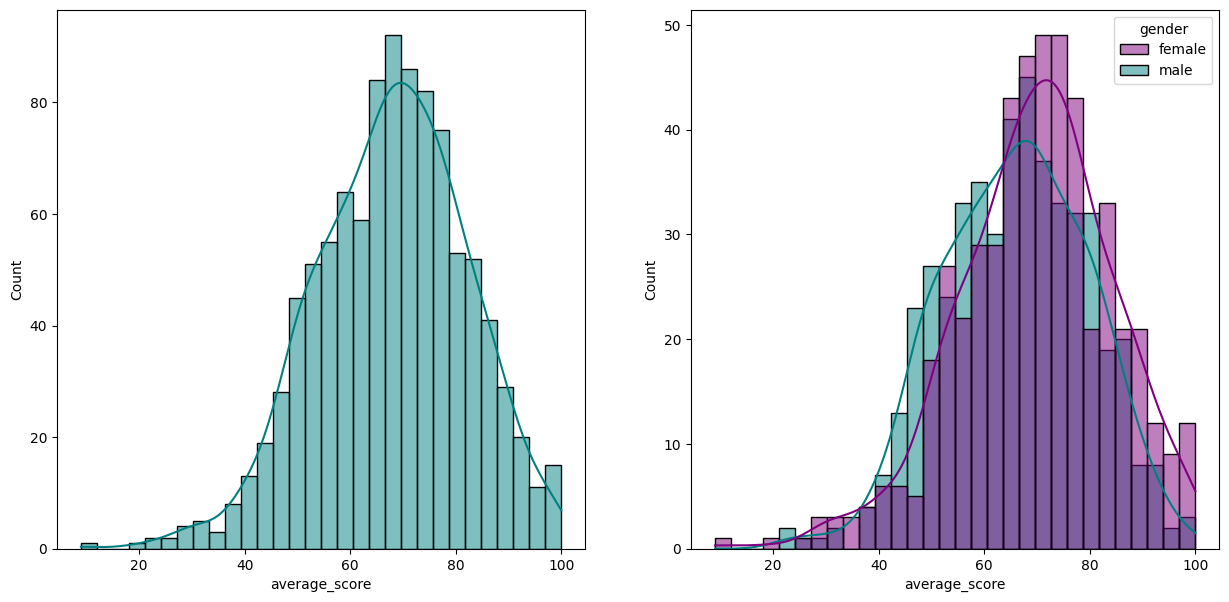

In [95]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=student_record,x='average_score',color='teal',kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=student_record,x='average_score',kde=True,hue='gender',palette={'male':'teal','female':'purple'},bins=30)
plt.show()

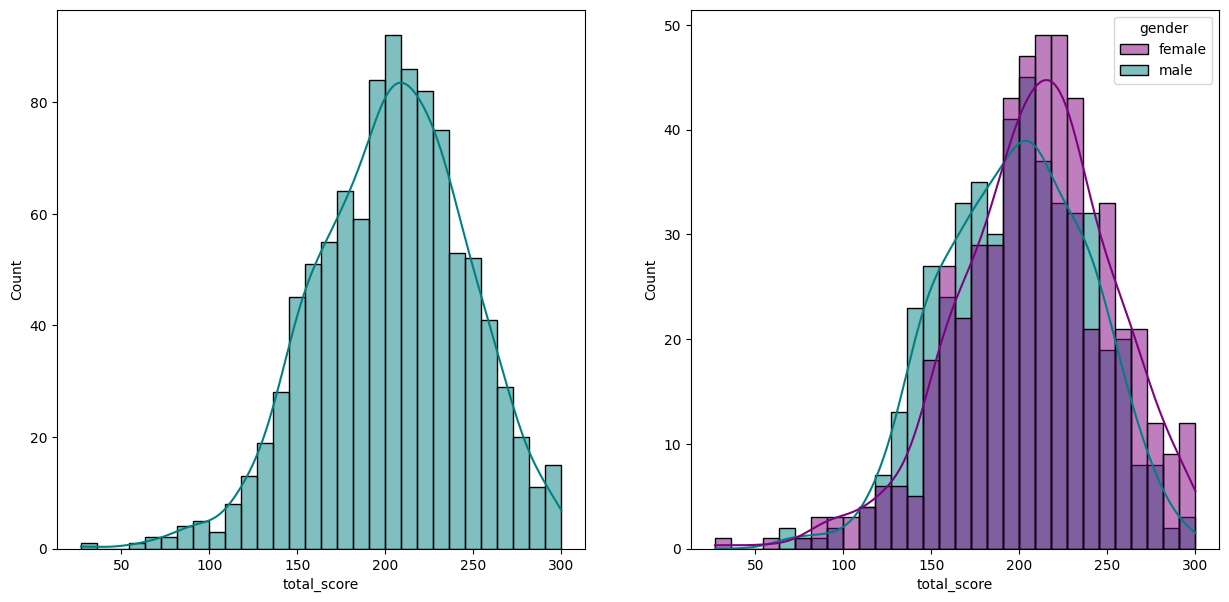

In [96]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=student_record,x='total_score',color='teal',kde=True,bins=30)
plt.subplot(122)
sns.histplot(data=student_record,x='total_score',kde=True,hue='gender',palette={'male':'teal','female':'purple'},bins=30)
plt.show()

Insights:<br>

- Female students perform well compared to male students.

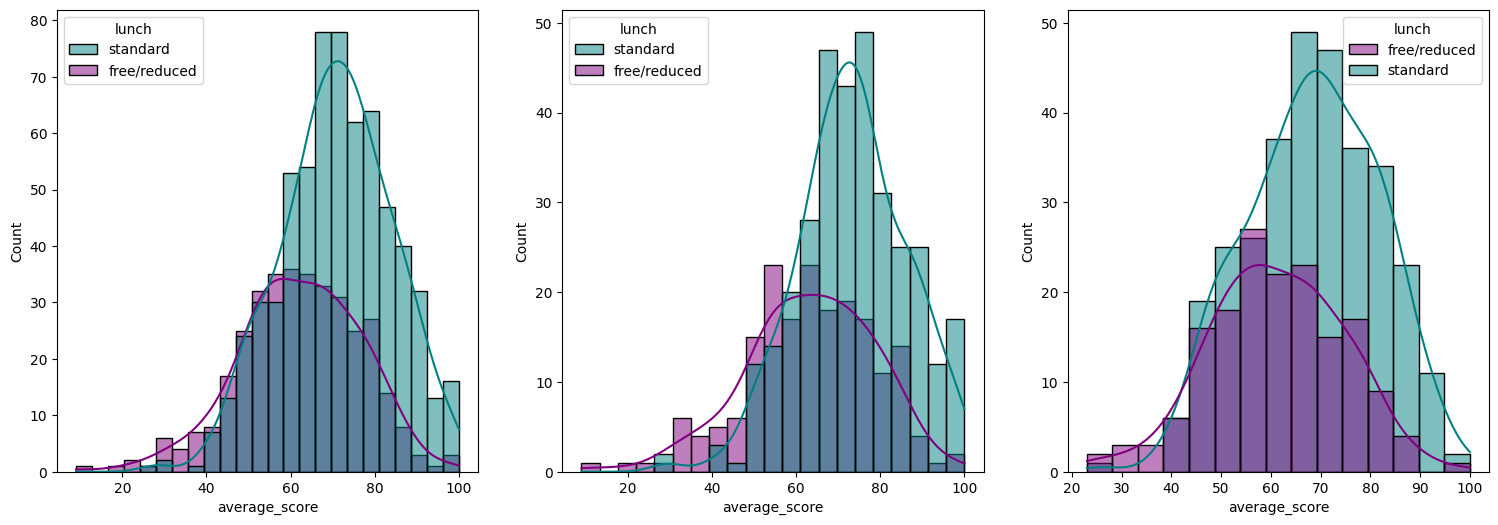

In [104]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=student_record,x='average_score',kde=True,hue='lunch',palette={'standard':'teal','free/reduced':'purple'})
plt.subplot(142)
sns.histplot(data=student_record[student_record.gender=='female'],x='average_score',kde=True,hue='lunch',palette={'standard':'teal','free/reduced':'purple'})
plt.subplot(143)
sns.histplot(data=student_record[student_record.gender=='male'],x='average_score',kde=True,hue='lunch',palette={'standard':'teal','free/reduced':'purple'})
plt.show()

Insights:
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=student_record,x='average_score',kde=True,hue='parental_level_of_education',palette={'standard':'teal','free/reduced':'purple'})
plt.subplot(142)
sns.histplot(data=student_record[student_record.gender=='female'],x='parental_level_of_education',kde=True,hue='lunch',palette={'standard':'teal','free/reduced':'purple'})
plt.subplot(143)
sns.histplot(data=student_record[student_record.gender=='male'],x='parental_level_of_education',kde=True,hue='lunch',palette={'standard':'teal','free/reduced':'purple'})
plt.show()

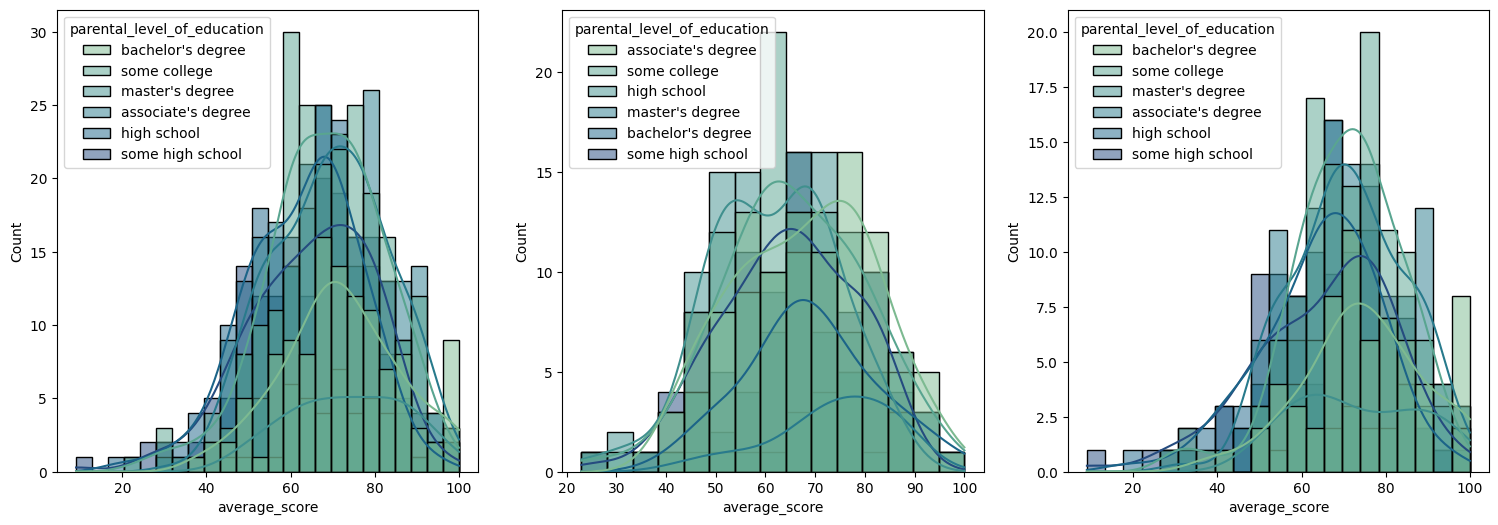

In [112]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=student_record,x='average_score',kde=True,hue='parental_level_of_education',palette='crest')
plt.subplot(142)
sns.histplot(data=student_record[student_record.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education',palette='crest')
plt.subplot(143)
sns.histplot(data=student_record[student_record.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education',palette='crest')
plt.show()

Insights:

- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
- 3rd plot we can see there is no effect of parent's education on female students.

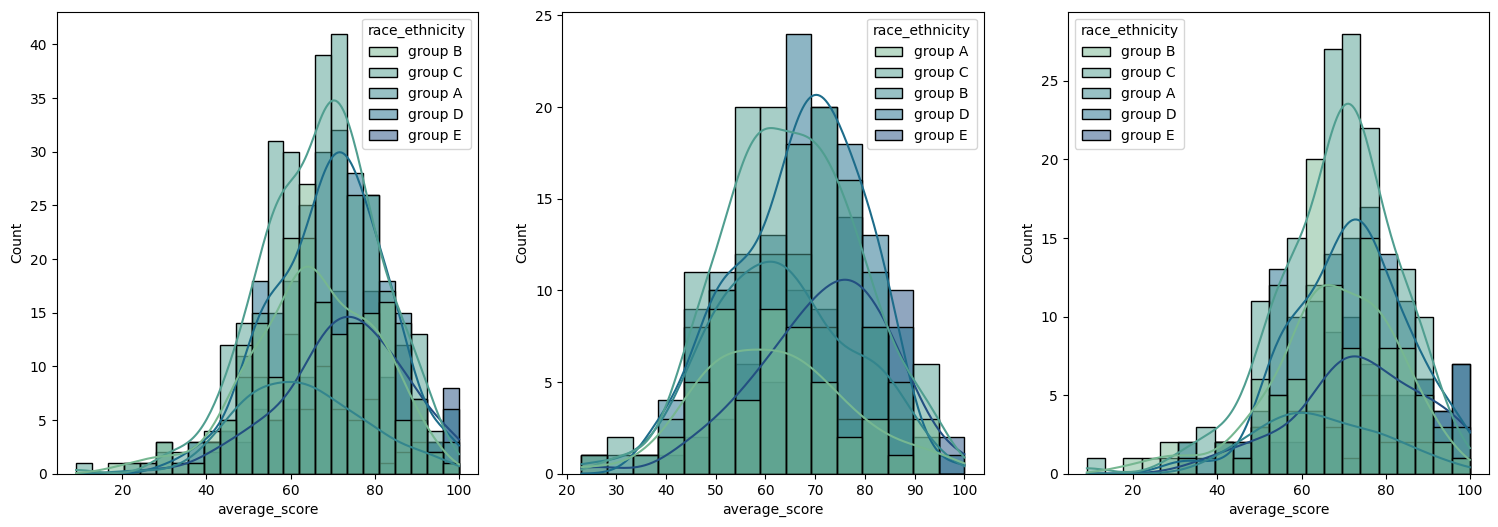

In [114]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=student_record,x='average_score',kde=True,hue='race_ethnicity',palette='crest')
plt.subplot(142)
sns.histplot(data=student_record[student_record.gender=='male'],x='average_score',kde=True,hue='race_ethnicity',palette='crest')
plt.subplot(143)
sns.histplot(data=student_record[student_record.gender=='female'],x='average_score',kde=True,hue='race_ethnicity',palette='crest')
plt.show()

Insights:

- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

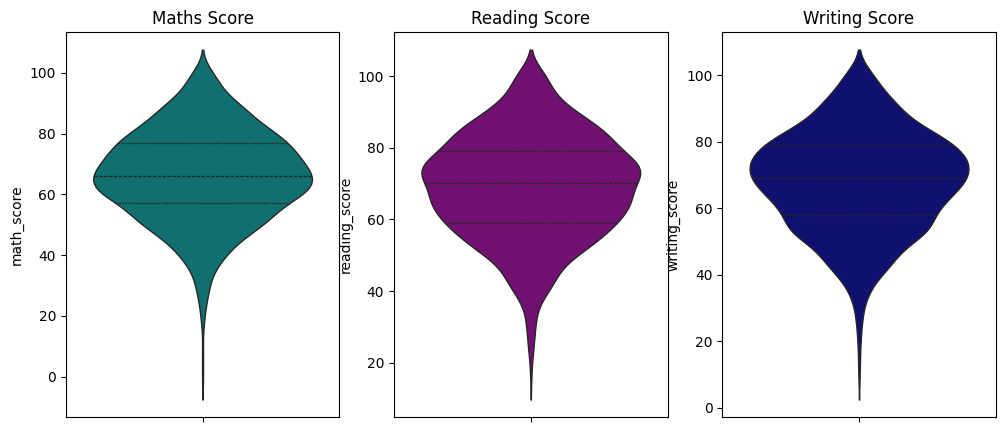

In [29]:
fig, axes = plt.subplots(1,3,figsize=(12,5))
plt.subplot(131)
plt.title('Maths Score')
sns.violinplot(y='math_score',data=student_record,color='teal',linewidth=1,inner="quartile")

plt.subplot(132)
plt.title('Reading Score')
sns.violinplot(y='reading_score',data=student_record,color='purple',linewidth=1,inner="quartile")

plt.subplot(133)
plt.title('Writing Score')
sns.violinplot(y='writing_score',data=student_record,color='navy',linewidth=1,inner="quartile")
plt.show()

Insights:

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##Multi Variate Analysis using pieplot

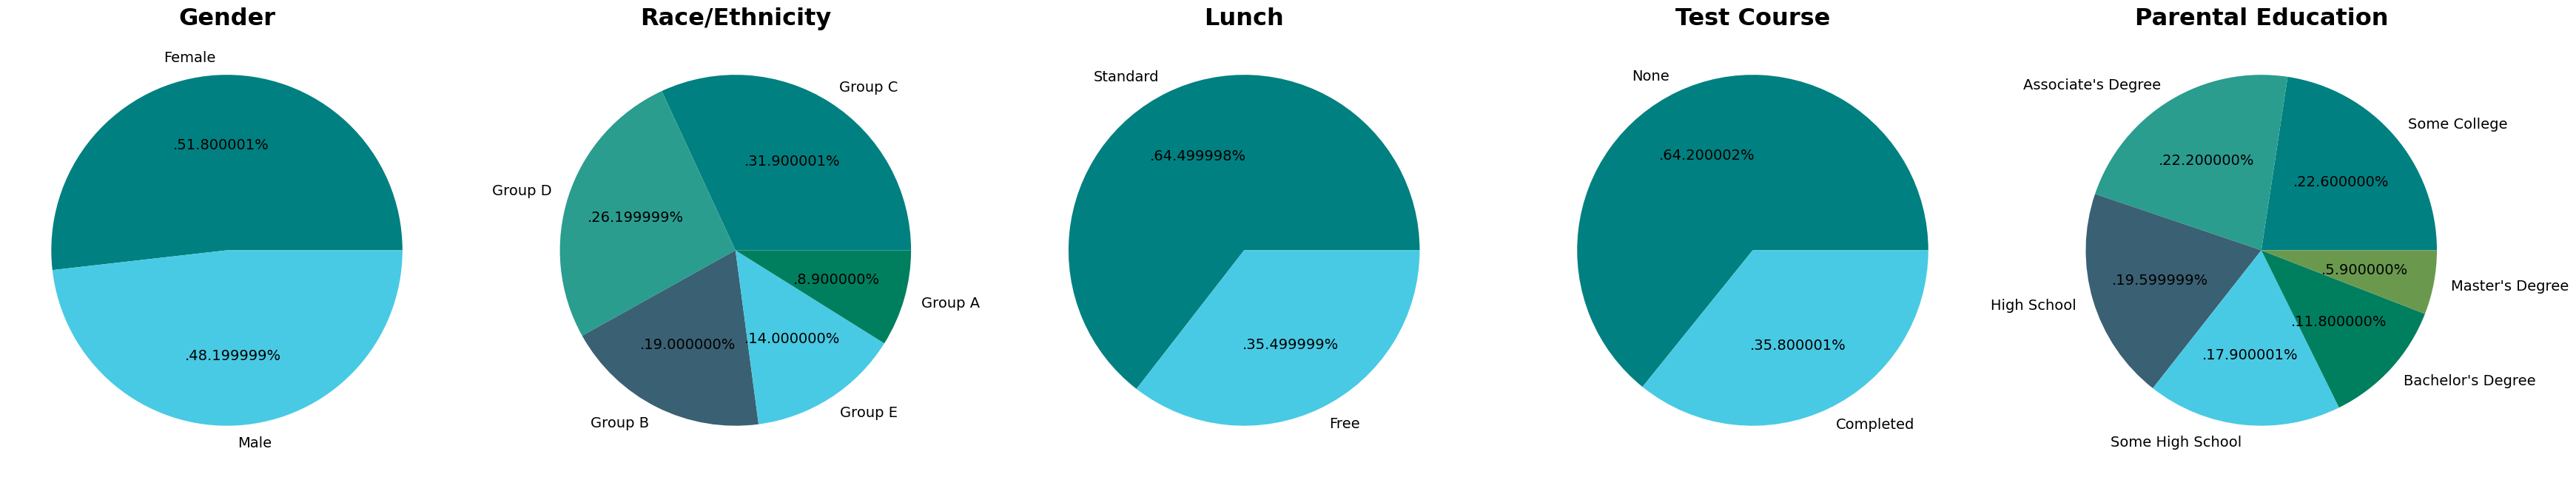

In [54]:
plt.rcParams['figure.figsize'] = (35, 17)

plt.subplot(1, 5, 1)
size = student_record['gender'].value_counts()
labels = 'Female', 'Male'
color = ['teal','#48cae4']
plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%',textprops={'fontsize': 14})
plt.title('Gender', fontsize = 23, fontweight='bold')
plt.axis('off')

plt.subplot(1, 5, 2)
size = student_record['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['teal', '#2a9d8f', '#3a6073', '#48cae4', '#007f5f']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%',textprops={'fontsize': 14})
plt.title('Race/Ethnicity', fontsize = 23, fontweight='bold')
plt.axis('off')

plt.subplot(1, 5, 3)
size = student_record['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['teal','#48cae4']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%',textprops={'fontsize': 14})
plt.title('Lunch', fontsize = 23, fontweight='bold')
plt.axis('off')

plt.subplot(1, 5, 4)
size = student_record['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['teal','#48cae4']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%',textprops={'fontsize': 14})
plt.title('Test Course', fontsize = 23, fontweight='bold')
plt.axis('off')

plt.subplot(1, 5, 5)
size = student_record['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['teal', '#2a9d8f', '#3a6073', '#48cae4', '#007f5f', '#6a994e']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%', textprops={'fontsize': 14})
plt.title('Parental Education', fontsize = 23, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Insights:

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"